# Hyper Parameter Tuning

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [26]:
import kerastuner as kt # for tuning

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [27]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

# Finding Best Optimizer

In [29]:
def build_model(hp): # hp = Hyper parameter
    model = Sequential()

    model.add(Dense(32,activation = 'relu', input_dim = 8))
    model.add(Dense(1,activation = 'sigmoid'))

    optimizer = hp.Choice('Optimizer',values = ['adam','sgd','rmsprop','adadelta'])

    model.compile(optimizer=optimizer,loss= 'binary_crossentropy',metrics = ['accuracy'])

    return model

In [30]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=5,
    # directory = 'result'
    )

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [31]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [32]:
tuner.get_best_hyperparameters()[0].values

{'Optimizer': 'adam'}

In [34]:
tuner.get_best_models()

In [35]:
model = tuner.get_best_models(num_models=1)[0]

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Training in best parameter

In [39]:
historyHyperModel = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_train,y_train))

Epoch 7/100
18/18 [==============================] - 1s 14ms/step - loss: 0.8728 - accuracy: 0.6736 - val_loss: 0.8111 - val_accuracy: 0.6649
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8085 - accuracy: 0.6528 - val_loss: 0.7576 - val_accuracy: 0.6736
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8387 - accuracy: 0.6372 - val_loss: 0.8648 - val_accuracy: 0.6649
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8045 - accuracy: 0.6545 - val_loss: 0.7907 - val_accuracy: 0.6337
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8113 - accuracy: 0.6406 - val_loss: 0.7091 - val_accuracy: 0.6753
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7382 - accuracy: 0.6684 - val_loss: 0.7204 - val_accuracy: 0.6736
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7208 - accuracy: 0.6701 - val_loss: 0.6821 - val_accuracy: 0.6997
Epoch 14

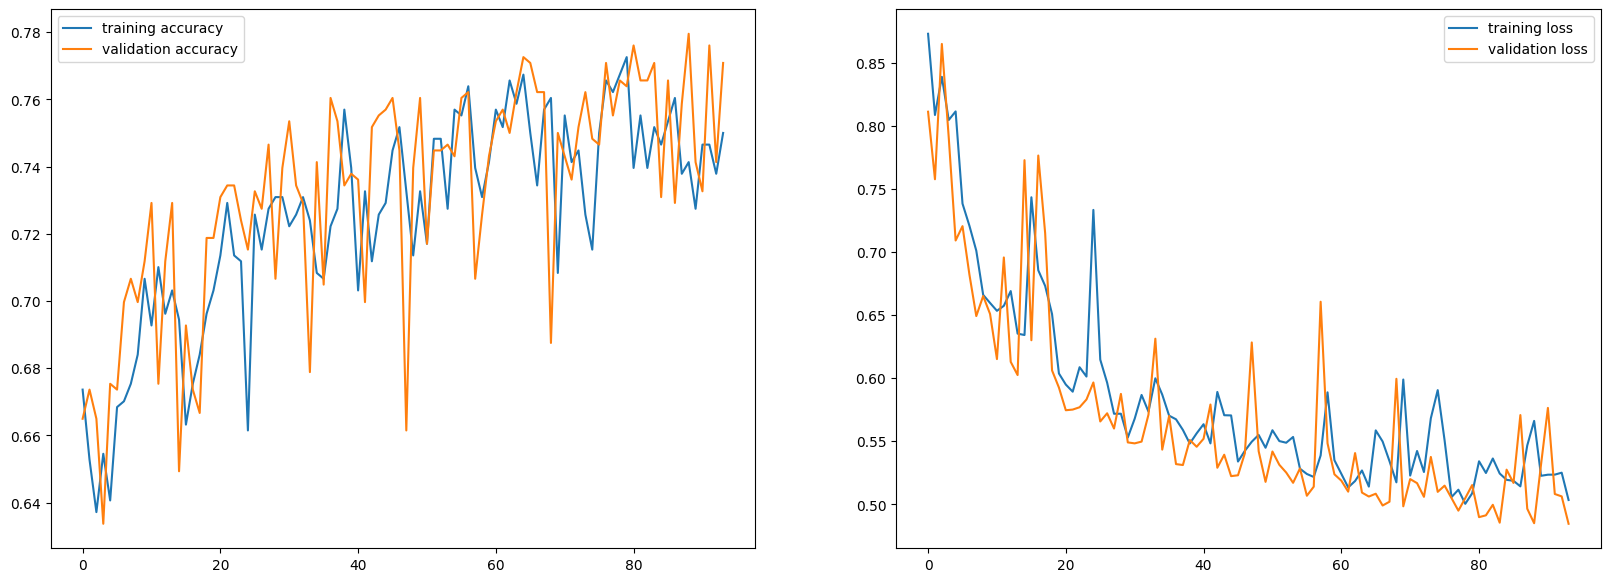

In [41]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(historyHyperModel.history['accuracy'])
plt.plot(historyHyperModel.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(historyHyperModel.history['loss'])
plt.plot(historyHyperModel.history['val_loss'])
plt.legend(['training loss','validation loss'])
